In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('Quality of Service 5G.csv')

In [115]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,09-03-2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,09-03-2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,09-03-2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,09-03-2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,09-03-2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [117]:
#Convert String in Signal Strength
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)

In [118]:
#Convert String in Latency
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)

In [119]:
#Convert Bandwidth from kbps to mbps
def convert_bandwidth(value):
    if 'Kbps' in value:
        return float(value.replace(' Kbps', '')) / 1000  # Convert Kbps to Mbps
    elif 'Mbps' in value:
        return float(value.replace(' Mbps', ''))
    else:
        return float(value)

In [120]:
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(convert_bandwidth)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(convert_bandwidth)

In [121]:
#Convert percentage to float
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(float) / 100

In [122]:
#Feature engineering and selection
X = df.drop(['Timestamp', 'User_ID', 'Resource_Allocation'], axis=1)
y = df['Resource_Allocation']

In [123]:
preprocessor = LabelEncoder()
X.Application_Type = preprocessor.fit_transform(X.Application_Type)
X

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth
0,6,-75.0,30.0,10.0,15.00
1,9,-80.0,20.0,0.1,0.12
2,5,-85.0,40.0,5.0,6.00
3,1,-70.0,10.0,1.0,1.50
4,4,-78.0,25.0,2.0,3.00
...,...,...,...,...,...
395,5,-110.0,61.0,1.3,1.80
396,6,-40.0,53.0,14.5,15.80
397,7,-113.0,58.0,1.0,1.40
398,1,-40.0,5.0,0.4,0.40


In [124]:
x = X.to_numpy()

In [125]:
x

array([[ 6.00e+00, -7.50e+01,  3.00e+01,  1.00e+01,  1.50e+01],
       [ 9.00e+00, -8.00e+01,  2.00e+01,  1.00e-01,  1.20e-01],
       [ 5.00e+00, -8.50e+01,  4.00e+01,  5.00e+00,  6.00e+00],
       ...,
       [ 7.00e+00, -1.13e+02,  5.80e+01,  1.00e+00,  1.40e+00],
       [ 1.00e+00, -4.00e+01,  5.00e+00,  4.00e-01,  4.00e-01],
       [ 1.00e+01, -1.13e+02,  0.00e+00,  1.00e-01,  1.00e-01]])

In [126]:
x.shape

(400, 5)

In [127]:
import joblib
joblib.dump(preprocessor, "column")

['column']

Model Building

In [128]:
#Data Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [129]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [130]:
#Predict
predictions = model.predict(x_test)

In [131]:
predictions

array([0.8995, 0.6   , 0.9   , 0.8005, 0.858 , 0.75  , 0.9   , 0.75  ,
       0.8   , 0.6   , 0.8125, 0.9   , 0.702 , 0.6995, 0.8885, 0.6645,
       0.7   , 0.6   , 0.7   , 0.9   , 0.6   , 0.85  , 0.7   , 0.708 ,
       0.7465, 0.75  , 0.75  , 0.8995, 0.7   , 0.85  , 0.8485, 0.8995,
       0.7   , 0.6   , 0.6   , 0.7   , 0.8845, 0.7   , 0.7   , 0.7445,
       0.7015, 0.85  , 0.7   , 0.85  , 0.7   , 0.7   , 0.85  , 0.7   ,
       0.694 , 0.6995, 0.713 , 0.9   , 0.7995, 0.7105, 0.7   , 0.7015,
       0.7   , 0.75  , 0.714 , 0.7   , 0.85  , 0.7   , 0.709 , 0.75  ,
       0.8   , 0.7765, 0.6   , 0.75  , 0.8   , 0.893 , 0.6   , 0.85  ,
       0.5685, 0.85  , 0.75  , 0.7   , 0.85  , 0.9   , 0.6   , 0.9   ])

In [132]:
y_test

209    0.90
280    0.60
33     0.90
210    0.80
93     0.90
       ... 
246    0.70
227    0.85
369    0.90
176    0.60
289    0.90
Name: Resource_Allocation, Length: 80, dtype: float64

In [133]:
#Evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0007550968749999963


In [134]:
#Mean Absolute Error(MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

#R-squared
accuracy = r2_score(y_test, predictions)
print(f'R-squared: {accuracy}')

Mean Absolute Error (MAE): 0.008418750000000568
R-squared: 0.9138224778208733


In [135]:
accuracy

0.9138224778208733

In [136]:
x.shape

(400, 5)

In [137]:
import pickle
pickle.dump(model, open('resalloc.pkl', 'wb'))

Visualize Result

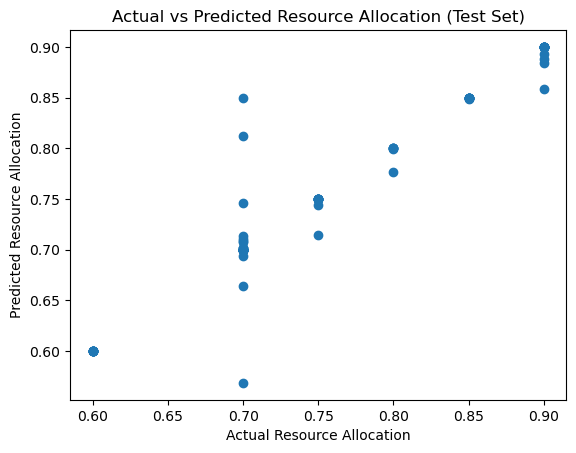

In [138]:
test_predictions = model.predict(x_test)
#Scatter Plot
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Resource Allocation')
plt.ylabel('Predicted Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.show()

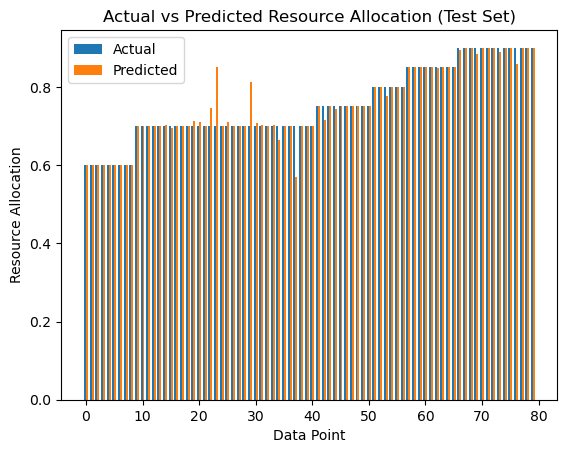

In [139]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})
comparison_df = comparison_df.sort_values(by='Actual')
x_indices = np.arange(len(comparison_df))
#Bar Chart
width = 0.35  # width of the bars
plt.bar(x_indices - width/2, comparison_df['Actual'], width, label='Actual')
plt.bar(x_indices + width/2, comparison_df['Predicted'], width, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

<Axes: >

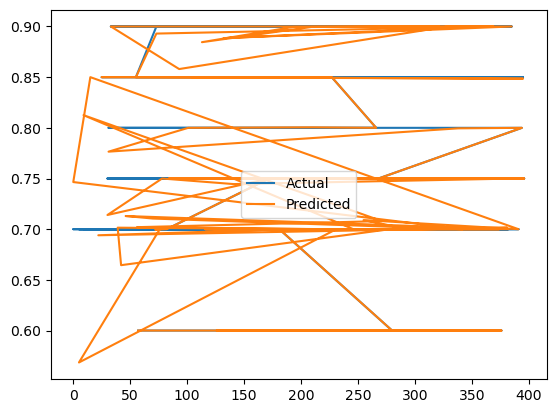

In [140]:
#Line Comparison
comparison_df.plot()

In [141]:
yp = model.predict([[6, -75.,  30.,  10.,  15.]])

In [142]:
yp

array([0.7465])

In [143]:
new = joblib.load('column')

In [144]:
p = new.fit_transform(["Video_Call", -75.,  30.,  10.,  15.])

In [145]:
p

array([4, 0, 3, 1, 2], dtype=int64)

In [146]:
p

array([4, 0, 3, 1, 2], dtype=int64)

In [147]:
y1 = model.predict([p])

In [148]:
y1

array([0.7825])

In [149]:
y2 = model.predict([new.fit_transform(["Video_Call", -75.,  30.,  10.,  15.])])

In [150]:
y2

array([0.7825])